In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('heart.csv')

## Explore Data

In [6]:
# The first 5 Rows By default
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# The last 5 rows by default
df.tail()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [8]:
# Rows and Columns 
df.shape

(918, 12)

In [9]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
# Descriptive or statistical information
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
# Check if there is missing data
# sum() --> To give me the result briefly
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
# Check if there is duplicated data
df.duplicated().sum()

np.int64(0)

## Analysis

In [13]:
# Number of people with and without heart disease
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: >

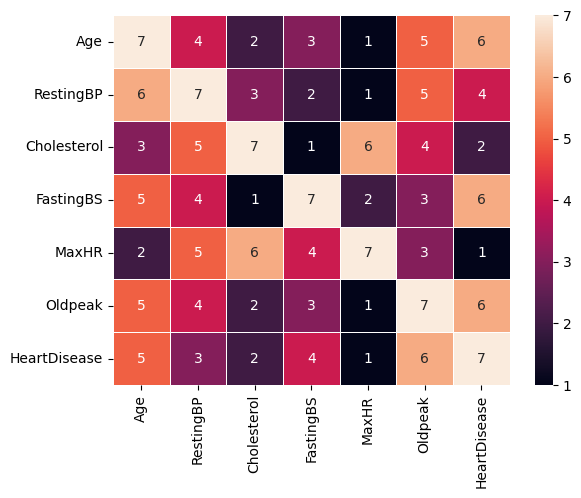

In [14]:
# The impact of each column on the other
numeric_df = df.select_dtypes(include=['number'])  # بنقدرش نشوف العلاقات الا بين الاعداد لهيك استبعدنا الباقي
correlation = numeric_df.corr()
sns.heatmap(correlation.rank(axis='columns'),annot=True,linewidths=0.5)


## Processing Data


In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder() # Convert Object data to numeric

In [16]:
object = df.select_dtypes(include='object') # Data of type object
non_object = df.select_dtypes(exclude='object') # Non-Object data 

# A loop that iterates over all object data and converts it to numeric
for i in object.columns:
    object[i] = label.fit_transform(object[i])

df = pd.concat([object,non_object],axis=1)
print(df)


     Sex  ChestPainType  RestingECG  ...  MaxHR  Oldpeak  HeartDisease
0      1              1           1  ...    172      0.0             0
1      0              2           1  ...    156      1.0             1
2      1              1           2  ...     98      0.0             0
3      0              0           1  ...    108      1.5             1
4      1              2           1  ...    122      0.0             0
..   ...            ...         ...  ...    ...      ...           ...
913    1              3           1  ...    132      1.2             1
914    1              0           1  ...    141      3.4             1
915    1              0           1  ...    115      1.2             1
916    0              1           0  ...    174      0.0             1
917    1              2           1  ...    173      0.0             0

[918 rows x 12 columns]


## Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [19]:
x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']


In [22]:
# 20% test , 80% train
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.8)


In [25]:
def all (model):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    print(confusion_matrix(prediction,y_test))
    print('-----------------------------------')
    print(classification_report(prediction,y_test))

In [26]:
model1 = KNeighborsClassifier()
all(model1)

[[55 28]
 [23 78]]
-----------------------------------
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        83
           1       0.74      0.77      0.75       101

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



In [27]:
model2 = DecisionTreeClassifier()
all(model2)

[[56 14]
 [22 92]]
-----------------------------------
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        70
           1       0.87      0.81      0.84       114

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.80       184
weighted avg       0.81      0.80      0.81       184



In [28]:
model3 = GaussianNB()
all(model3)

[[64 11]
 [14 95]]
-----------------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        75
           1       0.90      0.87      0.88       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [29]:
model4 = SVC()
all(model4)

[[60 32]
 [18 74]]
-----------------------------------
              precision    recall  f1-score   support

           0       0.77      0.65      0.71        92
           1       0.70      0.80      0.75        92

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



In [30]:
model5 = RandomForestClassifier()
all(model5)

[[66 10]
 [12 96]]
-----------------------------------
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        76
           1       0.91      0.89      0.90       108

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [31]:
model6 = GradientBoostingClassifier()
all(model6)

[[68 12]
 [10 94]]
-----------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        80
           1       0.89      0.90      0.90       104

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

